<a href="https://colab.research.google.com/github/namratabalwani/contribute-practice/blob/main/Project2_Bilinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import token
import sys
import numpy as np
import matplotlib as plt
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy import double
from skimage import io
from PIL import Image
import colorsys

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [6]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project2/Food.png')
M,N,C = I1.shape

In [7]:
I2 = cv.cvtColor(I1,cv.COLOR_RGB2GRAY)
#Normalise the values , values are normalized to improve the computations
#computations in cases where the image is passed through a deep neural network becomes more complex when
#we have higher values.

I6 = double(I1)/255.0

I7 = double(I2)/255.0


theta = 60

A = np.array([[0.5 * np.cos(np.deg2rad(theta)), -np.sin(np.deg2rad(theta))],
[np.sin(np.deg2rad(theta)), np.cos(np.deg2rad(theta))]])

T = np.array([10, 5]).T

p = A @ np.array([1, 1]).T + T
x1, y1 = p[0], p[1]
p = A @ np.array([1, N]).T + T
x2, y2 = p[0], p[1]
p = A @ np.array([M, 1]).T + T
x3, y3 = p[0], p[1]
p = A @ np.array([M, N]).T + T
x4, y4 = p[0], p[1]

xmin = int(np.floor(min([x1, x2, x3, x4])))
xmax = int(np.ceil(max([x1, x2, x3, x4])))
ymin = int(np.floor(min([y1, y2, y3, y4])))
ymax = int(np.ceil(max([y1, y2, y3, y4])))
Mp = int(np.ceil(xmax - xmin + 1))
Np = int(np.ceil(ymax - ymin + 1))

I8 = np.zeros((Mp, Np))
I4 = np.zeros((Mp, Np, 3))

In [8]:
#Bilinear Interpolation
Ap = np.linalg.inv(A)

for i in range(xmin, xmax + 1):
  for j in range(ymin, ymax + 1):
    p = Ap @ (np.array([i, j]).T - T)
    x0, y0 = p[0], p[1]
    minx, maxx = int(np.floor(x0)), int(np.ceil(x0))
    miny, maxy = int(np.floor(y0)), int(np.ceil(y0))
    dx, dy = x0 - minx, y0 - miny

    if 1 <= minx <= M and 1 <= maxx <= M and 1 <= miny <= N and 1 <= maxy <= N:
      x, y = int(np.round(i - xmin)), int(np.round(j - ymin))
      x_1 = (dx * I7[maxx - 1, miny - 1]) + ((1 - dx) * I7[minx - 1, miny - 1]) / (maxx - minx)
      x_2 = (dx * I7[maxx - 1, maxy - 1]) + ((1 - dx) * I7[minx - 1, maxy - 1]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)
      I8[x, y] = y_1

      x_1 = (dx * I7[maxx-1, miny-1]) + ((1 - dx) * I7[minx-1, miny-1]) / (maxx - minx)
      x_2 = (dx * I7[maxx-1, maxy-1]) + ((1 - dx) * I7[minx-1, maxy-1]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)
      I8[x-1, y-1] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 0]) + ((1 - dx) * I6[minx-1, miny-1, 0]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 0]) + ((1 - dx) * I6[minx-1, maxy-1, 0]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)
      I4[x-1, y-1, 0] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 1]) + ((1 - dx) * I6[minx-1, miny-1, 1]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 1]) + ((1 - dx) * I6[minx-1, maxy-1, 1]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)
      I4[x-1, y-1, 1] = y_1

      x_1 = (dx * I6[maxx-1, miny-1, 2]) + ((1 - dx) * I6[minx-1, miny-1, 2]) / (maxx - minx)
      x_2 = (dx * I6[maxx-1, maxy-1, 2]) + ((1 - dx) * I6[minx-1, maxy-1, 2]) / (maxx - minx)
      y_1 = (dy * x_2) + ((1 - dy) * x_1) / (maxy - miny)
      I4[x-1, y-1, 2] = y_1




Original Image


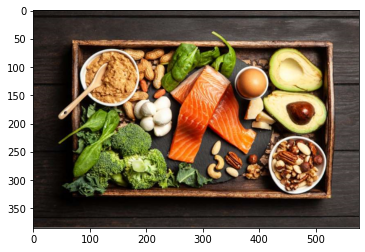

After Bilinear Interpolation: 


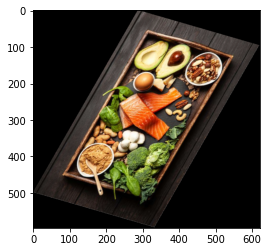

Grayscale Image:


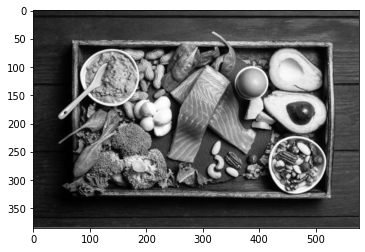

Bipolar Interpolation of Grayscale Image:


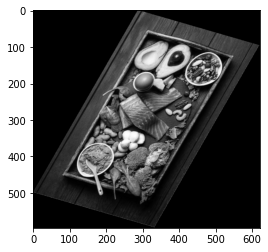

In [41]:
print("Original Image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()


print("After Bilinear Interpolation: ")
# I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_BGR2RGB)
pixels = np.array(lab_image)

plt.imshow(pixels)
plt.show()


print("Grayscale Image:")
pixels = np.array(I2)
plt.imshow(pixels, cmap='gray')
plt.show()

print("Bipolar Interpolation of Grayscale Image:")

img_float32 = np.float32(I4)
lab_image = cv.cvtColor(img_float32, cv.COLOR_RGB2GRAY)
pixels = np.array(lab_image)

plt.imshow(pixels, cmap='gray')
plt.show()




# New Section